<a href="https://colab.research.google.com/github/Hanishkaa01/DEEP-LEARNING-TECHNIQUES-LAB-EXP/blob/main/week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.6119 - val_loss: 0.0973
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5875 - val_loss: 0.0794
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4318 - val_loss: 0.1122
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0678 - val_loss: 0.0427
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0247 - val_loss: 0.1364
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0123 - val_loss: 0.0845
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0098 - val_loss: 0.1191
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0114 - val_loss: 0.0971
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0088 - val_loss: 0.1088
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0087 - val_loss: 0.0843
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0111 - val_loss: 0.1147
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0101 - val_l

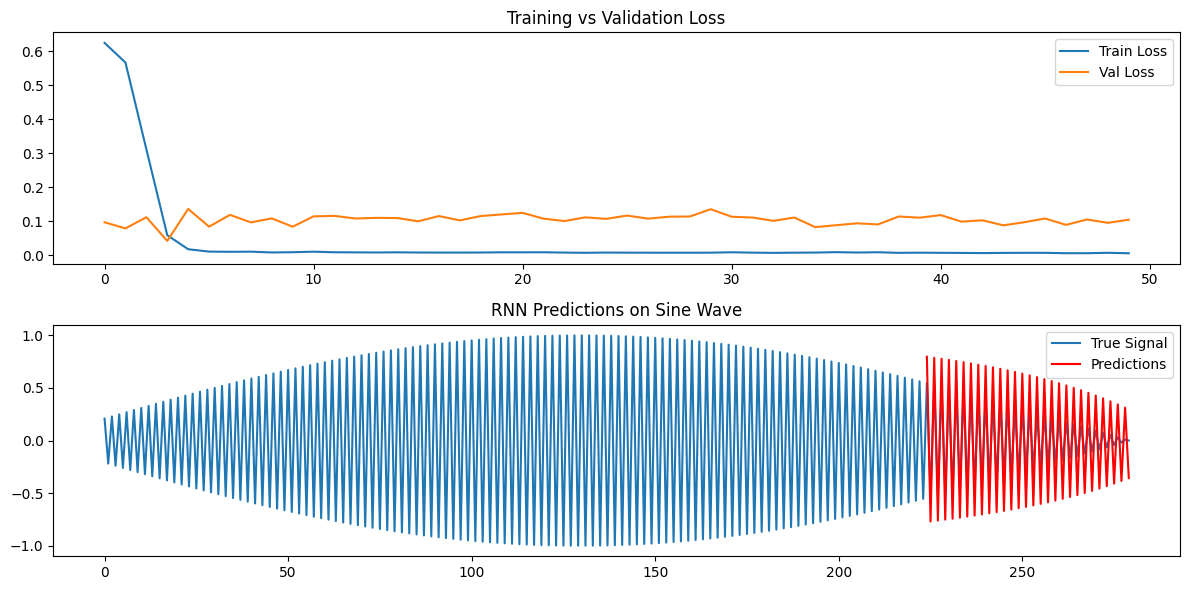

In [1]:


import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


def generate_sine_wave(seq_length, total_points):
    x = np.linspace(0, total_points * np.pi, total_points)
    y = np.sin(x)
    data = []
    labels = []
    for i in range(len(y) - seq_length):
        data.append(y[i:i+seq_length])
        labels.append(y[i+seq_length])
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

SEQ_LENGTH = 20
TOTAL_POINTS = 300

X, y = generate_sine_wave(SEQ_LENGTH, TOTAL_POINTS)


X = X.reshape((X.shape[0], X.shape[1], 1))


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


model = Sequential([
    LSTM(50, activation='tanh', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)


predictions = model.predict(X_test)


plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(range(len(y)), y, label='True Signal')
plt.plot(range(split, split + len(predictions)), predictions, label='Predictions', color='red')
plt.title('RNN Predictions on Sine Wave')
plt.legend()

plt.tight_layout()
plt.show()
